In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #This is for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score #Metrics for classification
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\GIT\Workshop Python\Data\Bank.csv")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
x=data.iloc[:,:7]
y=data.iloc[:,7]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Creating the logistic regression model

In [5]:
model=LogisticRegression()

# Training the model with training data

In [6]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Estimated coefficients for parameters and intercept of the model

In [7]:
model.coef_

array([[ 0.00102982,  0.00453546, -0.21666649,  0.42441349,  0.05623552,
        -0.2769508 , -0.0078621 ]])

In [8]:
model.intercept_

array([0.0038966])

# Predict the class of the unseen data

In [9]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Predicted probabilities for each observation

In [10]:
y_pred_probs=model.predict_proba(x_test)
y_pred_probs #Left side column for 0 and right side column for 1

array([[0.93744202, 0.06255798],
       [0.67199045, 0.32800955],
       [0.99149545, 0.00850455],
       ...,
       [0.99216232, 0.00783768],
       [0.94365258, 0.05634742],
       [0.99442535, 0.00557465]])

# Confusion matrix 

In [11]:
confusion_matrix(y_test,y_pred)

array([[7157,  168],
       [ 606,  307]], dtype=int64)

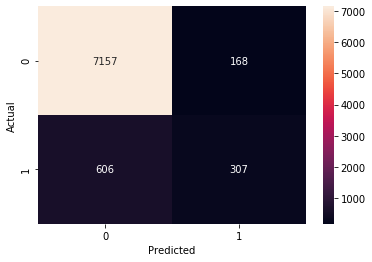

In [12]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Values inside the Confusion Matrix

In [13]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [14]:
tn

7157

In [15]:
fn

606

In [16]:
tp

307

In [17]:
fp

168

# Accuracy & Misclassification Error

In [18]:
accuracy=(np.diag(confusion_matrix(y_test,y_pred)).sum())/len(y_test)
accuracy

0.9060451565914057

In [19]:
MCE=1-accuracy
MCE

0.09395484340859428

# Classification report with more metrics

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



# Receiver operating characteristic Curve (ROC Curve)

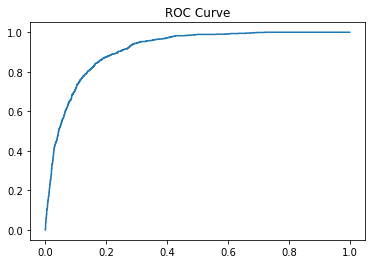

In [21]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()

In [22]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
auc

0.9121247509429588